© 2024 By Soham Bhosale, Sara Billey, Herman Chau, Zihan Chen, Isaac Hartin Pasco, Jennifer Huang, Snigdha Mahankali, Clare Minerath, and Anna Willis is licensed under [CC BY-ND 4.0](http://creativecommons.org/licenses/by-nd/4.0/?ref=chooser-v1)

**Preliminary/**

Suppose we have a matrix $
A= \begin{bmatrix}
1 & 4 & 3 & 1 \\
-1 & -4 & -1 & 0 \\
2 & 8 & 6 & 4
\end{bmatrix} \in \mathbb{R}^{3\times4} $， here's the way we define matrix in sage:

In [0]:
A = Matrix([[1, 4, 3, 1], [-1, -4, -1, 0], [2, 8, 6, 4]]) 
print("A is:")
print(A)
print("Transpose of A is:")
print(A.transpose())

A is:
[ 1  4  3  1]
[-1 -4 -1  0]
[ 2  8  6  4]
Transpose of A is:
[ 1 -1  2]
[ 4 -4  8]
[ 3 -1  6]
[ 1  0  4]


In [74]:
A.dimensions(), A.transpose().dimensions()

((3, 4), (4, 3))

In [34]:
A.echelon_form()

[1 4 1 0]
[0 0 2 1]
[0 0 0 2]

In [0]:
A.rref()      # reduced row echelon form

[1 4 0 0]
[0 0 1 0]
[0 0 0 1]

In [115]:
A = Matrix([[1, 4, 3, 1], [-1, -4, -1, 0], [2, 8, 6, 4]])
A.inverse() 

ArithmeticError: self must be a square matrix.

In [38]:
A2 = Matrix([[1, 4, 3, 1], [-1, -4, -1, 0], [2, 8, 6, 4], [1, 2, 3, 0]])
A2.inverse() 

[  -5 -3/2  5/4    2]
[   1    0 -1/4 -1/2]
[   1  1/2 -1/4    0]
[  -1    0  1/2    0]

Special Matrices:

In [82]:
I = identity_matrix(5)                    # (x): x by x
Z = zero_matrix(QQ, 5, 5)                 # (QQ,x,y)/(RR,x,y)/(x,y): x by y
D = diagonal_matrix([1, 2, 3, 4, 5])      # diagonal terms
I,Z,D

(
[1 0 0 0 0]  [0 0 0 0 0]  [1 0 0 0 0]
[0 1 0 0 0]  [0 0 0 0 0]  [0 2 0 0 0]
[0 0 1 0 0]  [0 0 0 0 0]  [0 0 3 0 0]
[0 0 0 1 0]  [0 0 0 0 0]  [0 0 0 4 0]
[0 0 0 0 1], [0 0 0 0 0], [0 0 0 0 5]
)

*Useful Commands in the future:

In [0]:
A.rank()              
A.determinant()                
A.eigenvalues()      
A.eigenvectors_right() 
A.charpoly()             # characterstic polynomial
A.kernel()             
A.column_space()       
A.row_space()    

# decomposition
A.LU()                     # LU decom.
A.QR()                     # QR decom.
A.SVD()                    # SVD decom.（need numpy）

<h2 style="text-align: center;">Welcome to Chapter 3: The Paradise of <i>Matrices</i></h2>
<p style="text-align: center;" >Originally created by Zihan Chen | zchen84@uw.edu </p>
<h5><strong>Preface:</strong></h5>

This <strong>Sage Worksheet</strong> is a part of a $Linear$ $Algebra$ tutorial created by Prof.$Sara$ $Billey$'s 2024 <i>WXML</i> group. Referred to $Linear$ $Algebra$ $with$ $Applications$ $by$ $Holt$, $2^{nd}$ $edition$, this Worksheet is intended to help future $UW$ $Math208$ students with some tools and software to present more visual linear algebra content. This Worksheet will revolve around $Section 3.1$ of $Holt$'s Book.
<h5><strong>Get Strart:</strong></h5>

I am delighted to share with you the basic knowledge of matrices, an important part of $linear$ $algebra$. But allow me to start with $linear$ $transformations$. You might wonder what the connection between $linear$ $transformations$ and $matrices$ is, but I believe after this section, you will have a better understanding of $linear$ $transformations$. Let's begin with $Section 3.1$: $Linear$ $Transformations$!

$3.1—$ $Linear$ $Transformations$

You might be familiar with what a transformation is, which is the operation of changing the position or appearance of a figure. But what exactly is '$linear$'? Why use '$linear$' to describe a $transformation$?
In textbooks, we have a clear definition of linear transformation. 

$Theorem 1:$ A function $ T: \mathbb{R}^m \rightarrow \mathbb{R}^n $ is a linear transformation if for all vectors $ u $ and $ v $ in $\mathbb{R}^m $ and all scalars $r$, we have:

$$T(u + v) = T(u) + T(v)$$
$$T(ru) = rT(u)$$  


Let's consider a simple example:

$Example1:$ Let $T\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{bmatrix} x^2 \\ x + y \end{bmatrix}$. We will try to determine whether $T$ is a linear transformation using $Theorem 1$.


In [89]:
"""
    This function is for checking 2 conditions of the linear transformation
    1. closed under addition
    2. closed under scalar multiplication
    
    Inputs:
    -------
    variables named x1,x2,y1,y2, in symbolic form
    
    Outputs:
    --------
    (additive_check,homogeneity_check), that is, (satisfy condition 1? , satisfy condition 2?)
    eg. (satisfy condition 1, not satisfy condition 2)=(True,False)
"""

# define unknown symbols（skip choosing concrete numbers here just for demonstrate more representative examples）
var('x_1 x_2 y_1 y_2 c')

# define x and y, note here SR: Symbolic Ring, you can delete them!
# we use unknown variables to make our line changes more representative:)
x = vector(SR, [x_1, x_2])
y = vector(SR, [y_1, y_2])

# define transformation T 
def T(v):
    x, y = v
    return vector([x^2, x + y])        
    # you can change the "return vector" if you want)

# check first condition: T(x+y) ?=? Tx+Ty
additive_check = T(x + y) == T(x) + T(y)

# check second condition: cT(x) ?=? T(c*x)
homogeneity_check = c * T(x) == T(c * x)

# output results
(additive_check, homogeneity_check)


(False, False)

This does not seem to be a linear transformation because we checked whether $A(x + y) = Ax + Ay$ and whether $cA(x) = A(c \cdot x)$. Both of these conditions are false in our example, so we can conclude that this is **not** a linear transformation.

Similarly, I encourage you to modify this expression and think about when it would be a linear transformation. ($Hint$: What should be the highest power of the unknowns in a linear transformation?)

Let's consider $Example2$ and try to determine whether it is a linear transformation by observing the equation.

$Example2:$ Let $T_2\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{bmatrix} x+y \\ x + y+1 \end{bmatrix}$. We will try to determine whether $T_2$ is a linear transformation using $Theorem1$.

In [4]:
"""
    Same function as before
 
    Inputs:
    -------
    variables named x1,x2,y1,y2, in symbolic form
    
    Outputs:
    --------
    (additive_check,homogeneity_check)
"""

var('x_1 x_2 y_1 y_2 c')

x = vector(SR, [x_1, x_2])
y = vector(SR, [y_1, y_2])

def T_2(v):
    x, y = v
    return vector([x+y, x+y+1])

additive_check = T_2(x + y) == T_2(x) + T_2(y)

homogeneity_check = c * T_2(x) == T_2(c * x)

(additive_check, homogeneity_check)

(False, False)

I assume you've already understood how to simply observe an expression to conclude whether it's a linear transformation. Now, I want to present another example to help you understand better.

$Example3:$ Suppose we have a transformation $ T_3\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = \begin{bmatrix} 2x \\ 2y \end{bmatrix} $. I'd like you to determine whether this is a linear transformation, but this time, I have a request:

* I hope you can represent this linear transformation in the form: $ T_3\left(\begin{bmatrix} x \\ y \end{bmatrix}\right) = A\begin{bmatrix} x \\ y \end{bmatrix} $.
* Insert *any* coordinates you like for $x$ and $y$.
* Determine whether this is a linear transformation based on the $Theorem1$.

Of course, I will also provide my answer, let's try it together!

1. Represent this linear transformation: $ T(\begin{bmatrix} x \\ y \end{bmatrix}) = \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix}$, where $A=\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}.$ In response, we defined matrix $A$ in sage:

In [91]:
#step1 define a matrix
A = matrix([[2,0],[0,2]])
A

[2 0]
[0 2]

2. Insert my favorite coordinates: $u=[1,2]^T, v=[2,3]^T$.
3. Check whether it is a linear transformation.

In [6]:
"""""
     Inputs:
     -------
     vectors you like, u & v
    
     Outputs:
     --------
     (additive_check,homogeneity_check)
"""""

#step2 input the vector you want
u = vector([1,2])
v = vector([2,3])
r = 5

#step3 determine whether it is linear transformation?    
check1 = A*u+A*v == A*(u+v)
check2 = r*A*u == A*(r*u)
(check1, check2)

(True, True)

If your attempt concluded that this is a linear transformation, congratulations, you are correct. But is this a coincidence or a necessity? Let's see what the textbook says. 

$Theorem2:$ Let $A$ be an $n×m$ matrix, and define $ T(x) = Ax $. Then $ T: \mathbb{R}^m \rightarrow \mathbb{R}^n $ is a linear transformation. 

So, we now know that any matrix can represent a linear transformation. In other words, if a transformation is linear, we can always write it in the form of a matrix. This is indeed a remarkable conclusion! I encourage you to explore more possibilities!

Also, I would like to introduce a more abstract concept for you to understand, which is also an effective way to judge linear transformations. This theorem is also in the book.

$Theorem3:$ Let $[a_1  a_2  ... a_m]$ be an $n×m$ matrix, and let $ T: \mathbb{R}^m \rightarrow \mathbb{R}^n $ with $ T(x) = Ax $ be a linear transformation. Then 

* The vector $ w $ is in the range of $ T $ if and only if $ Ax = w $ is a consistent linear system.
* $range$($ T $) = $span${$ a_1, …, a_m $}. 

The proofs are all in the textbook, but I want to give a simple example to illustrate this theorem.

$Example4:$ Suppose we have a simple $ R^1 \rightarrow R^1 $ transformation, $ T(x) = x^2 $. Is $T$ a linear transformation？
(Hint:Can you determine the domain and codomain through this linear transformation?)

Let's look at one fun example of a linear transformation.

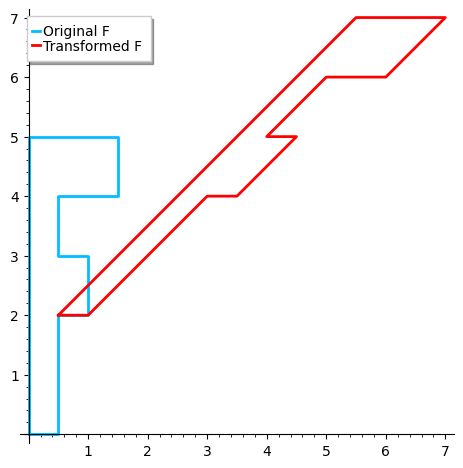

In [118]:
# Define the outline of the letter F starting at (0, 0) with a longer top bar
F_pts = [
    vector((0, 0)),     # bottom left
    vector((0, 5)),     # up to top left
    vector((1.5, 5)),   # <-- extended top bar to x = 1.5
    vector((1.5, 4)),   # down slightly
    vector((0.5, 4)),   # inward to form middle arm
    vector((0.5, 3)),   # down to bottom of middle arm
    vector((1, 3)),     # right end of middle arm
    vector((1, 2)),     # down again
    vector((0.5, 2)),   # inward to bottom arm
    vector((0.5, 0)),   # down to bottom left
    vector((0, 0))      # close the loop
]

# Transformation: identity (no distortion), shift right 3 and up 2
A = matrix([[1, 1], [0, 1]])
V = vector([0.5, 2])

# Apply transformation
F_transformed = [A * p + V for p in F_pts]

# Plot original and transformed Fs
original = line(F_pts, color='deepskyblue', thickness=2, legend_label='Original F')
transformed = line(F_transformed, color='red', thickness=2, legend_label='Transformed F')

# Display result
show(original + transformed, aspect_ratio=1)



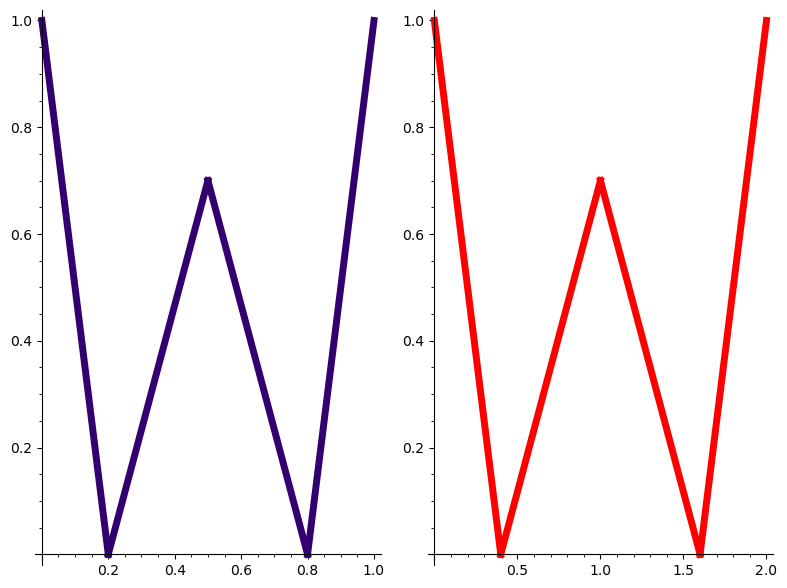

In [76]:
# Define original W points using vectors
original_pts = [
    vector((0, 1)),
    vector((0.2, 0)),
    vector((0.5, 0.7)),
    vector((0.8, 0)),
    vector((1.0, 1))
]

# Connect points to form W shape
def connect_pts(pts, color='blue', thickness=4, label=None):
    G = Graphics()
    for i in range(len(pts) - 1):
        G += line([pts[i], pts[i+1]], color=color, thickness=thickness)
    if label:
        G += text(label, (0.5, 1.2), color=color, fontsize=10)
    return G

# Apply a linear transformation
def transform_pts(pts, matrix):
    return [matrix * p for p in pts]

# Original W (UW purple)
uw_purple = (51/255.0, 0, 111/255.0)
W = connect_pts(original_pts, color=uw_purple, thickness=5)

# Choose a transformation matrix
# T = matrix([[0, -1], [1, 0]])       # Rotation 90°
# T = matrix([[2, 0], [0, 0.5]])      # Scaling
# T = matrix([[1, 1], [0, 1]])        # Shear
# T = matrix([[1, 0], [0, -1]])       # Reflection

T = matrix([[2, 0], [0, 1]])

transformed_pts = transform_pts(original_pts, T)
W_trans = connect_pts(transformed_pts, color='red', thickness=5)

# Combine them side-by-side in a graphics array
G = graphics_array([[W, W_trans]])
show(G, figsize=8)


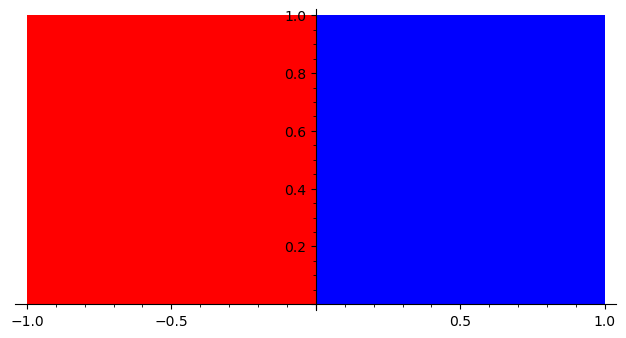

In [96]:
"""
    This function is for illustrating the rotation transformation.
"""

# Define a linear transformation, e.g., a rotation
def linear_transform(v):          # Define the rotation matrix, e.g., rotation by 45 degrees
    theta = pi / 2                # I suggest modifying this parameter
    rotation_matrix = matrix([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    return rotation_matrix * v

# Create vertices of the initial shape, for example, a unit square
square_vertices = [(0,0), (1,0), (1,1), (0,1)]

# Apply the linear transformation to each vertex
transformed_vertices = [linear_transform(vector(v)) for v in square_vertices]

# Create the original shape and the transformed shape
square = polygon(square_vertices, color='blue')
transformed_square = polygon(transformed_vertices, color='red')

# Display the original and the transformed shapes
show(square + transformed_square)

This is what I consider to be the quintessential example of a linear transformation. What did you observe from it? First and foremost, the two shapes appear identical. By calculating the area, we can determine that they are exactly the same. If we take the blue square as the initial state, can you describe the process of transformation from blue to red? What do you notice when you focus your attention on the basis vectors $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $ \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ represented?

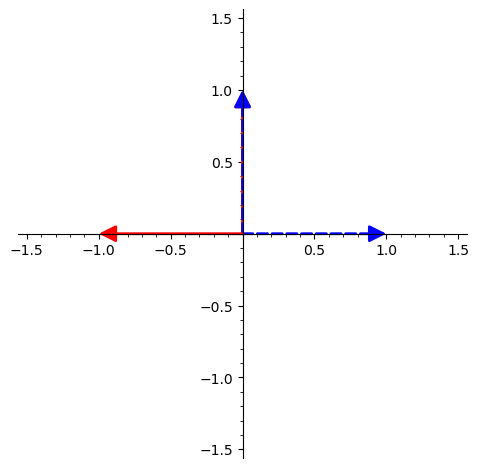

In [8]:
"""
    This function is for illustrating the rotation transformation as well. 
"""
    
# Define vectors and their transformations
vectors = {'original': [(1, 0), (0, 1)], 'transformed': [(0, 1), (-1, 0)]}

# Create a plot object
p = plot([])

# Plot original and transformed vectors
for (ox, oy), (tx, ty) in zip(vectors['original'], vectors['transformed']):
    # Plot original vector (in blue)
    p += arrow((0, 0), (ox, oy), color='blue', linestyle='dashed')
    # Plot transformed vector (in red)
    p += arrow((0, 0), (tx, ty), color='red')

# Set properties of the plot
p.show(xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5, aspect_ratio=1)

As can be seen in the above figure, the vector $ \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ is transformed to $ \begin{bmatrix} 0 \\ 1 \end{bmatrix} $, and $ \begin{bmatrix} 0 \\ 1 \end{bmatrix} $ is transformed to $ \begin{bmatrix} -1 \\ 0 \end{bmatrix} $! We have found the trick: by observing the transformation of the basis vectors $e_1, e_2, e_3,$ we can determine the nature of this linear transformation. I am eager to share more interesting examples of linear transformations with you.

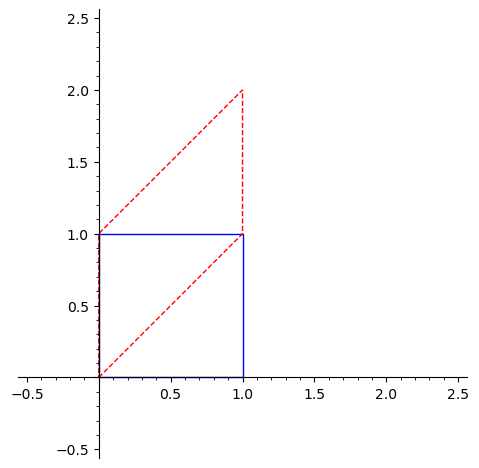

In [9]:
"""
    This function is for illustrating the shear transformation.
"""

# Define the shear transformation matrix
k = 1  # Shear factor
shear_matrix = matrix([[1, k], [0, 1]])

# Define the vertices of a square
square = matrix([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Apply the shear transformation
transformed_square = square * shear_matrix

# Plot the original square and the sheared square
original_plot = polygon(list(square), color='blue', fill=False)
transformed_plot = polygon(list(transformed_square), color='red', fill=False, linestyle='--')

# Display the plot
show(original_plot + transformed_plot, xmin=-0.5, xmax=2.5, ymin=-0.5, ymax=2.5, aspect_ratio=1)

Observe this; it's an interesting shear transformation. Can you tell where each of the basis vectors has been transformed to？

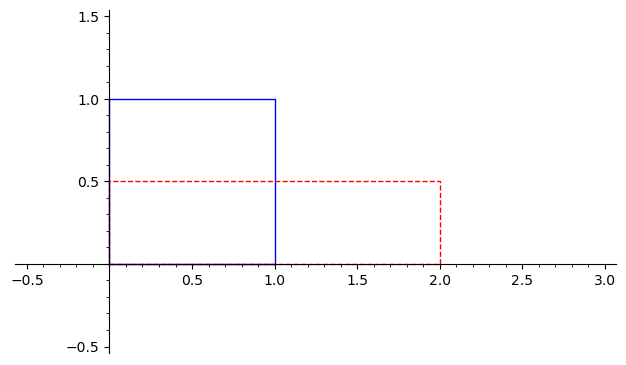

In [10]:
"""
    This function is for illustrating the scaling transformation.
"""
    
# Define scale factors
s_x = 2  # Scale factor for the X-axis
s_y = 0.5  # Scale factor for the Y-axis
scale_matrix = matrix([[s_x, 0], [0, s_y]])

# Define the vertices of a square
square = matrix([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Apply scaling transformation
transformed_square = square * scale_matrix

# Plot the original square and the scaled square
original_plot = polygon(list(square), color='blue', fill=False)
transformed_plot = polygon(list(transformed_square), color='red', fill=False, linestyle='--')

# Display the plot
show(original_plot + transformed_plot, xmin=-0.5, xmax=3, ymin=-0.5, ymax=1.5, aspect_ratio=1)

I find the method of observing linear transformations through $base$ $vectors$ particularly useful, especially when dealing with abstract three-dimensional linear transformations. For instance, consider an abstract matrix where its column vectors are given by $E_1 = \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix}$, $E_2 = \begin{bmatrix} 3 \\ 1.5 \\ 2 \end{bmatrix}$, and $E_3 = \begin{bmatrix} 0 \\ 2 \\ 3 \end{bmatrix}$. It might be challenging to visualize this linear transformation at first. So, how can we understand this linear transformation? I suggest we deduce the transformation process by observing the changes in the $base$ $vectors$. Let's focus on the three $base$ $vectors$, labeled in $green$, $red$, and $blue$, respectively. Based on the diagram below, can you identify the characteristics of this linear transformation?</p>

In [70]:
from sage.all import line3d, vector, Graphics, point3d, arrow3d, text3d

# Base vectors
e1 = vector([1, 0, 0])
e2 = vector([0, 1, 0])
e3 = vector([0, 0, 1])

# Transformed vectors
E1 = vector([1, 0, 1])
E2 = vector([3, 1.5, 2])
E3 = vector([0, 2, 3])

# Original and transformed vector lines
lines = line3d([vector([0,0,0]), e1], color='darkgreen', thickness=2) + \
        line3d([vector([0,0,0]), e2], color='darkred', thickness=2) + \
        line3d([vector([0,0,0]), e3], color='darkblue', thickness=2) + \
        line3d([vector([0,0,0]), E1], color='green', thickness=4) + \
        line3d([vector([0,0,0]), E2], color='red', thickness=4) + \
        line3d([vector([0,0,0]), E3], color='blue', thickness=4)

# Markers
marks = point3d([e1, e2, e3, E1, E2, E3], color='grey', size=1)

# Dashed grid
def create_dashed_3d_grid(size, color, thickness=1, linestyle='--'):
    grid = Graphics()
    for i in range(0, size + 1):
        for j in range(0, size + 1):
            grid += line3d([(i, j, 0), (i, j, size)], color=color, thickness=thickness, linestyle=linestyle)
            grid += line3d([(i, 0, j), (i, size, j)], color=color, thickness=thickness, linestyle=linestyle)
            grid += line3d([(0, i, j), (size, i, j)], color=color, thickness=thickness, linestyle=linestyle)
    return grid

grid = create_dashed_3d_grid(5, 'lightgrey', thickness=1, linestyle='--')

# Axis arrows and labels
axis_arrows = arrow3d((0,0,0), (1.5,0,0), color='green', thickness=2) + \
              arrow3d((0,0,0), (0,1.5,0), color='red', thickness=2) + \
              arrow3d((0,0,0), (0,0,1.5), color='blue', thickness=2)

axis_labels = text3d("x", (1.7, 0, 0), color='green', fontsize=10) + \
              text3d("y", (0, 1.7, 0), color='red', fontsize=10) + \
              text3d("z", (0, 0, 1.7), color='blue', fontsize=10)

# Final 3D plot
plot = lines + marks + grid + axis_arrows + axis_labels
plot.show(frame=False, aspect_ratio=1)


Graphics3d Object

Now let's look at one-to-one and onto linear transformations. As usual, let's start with the textbook definitions.

First, let's consider $one-to-one$:

Let $A$ be an $n×m$ matrix and define $ T: \mathbb{R}^m \rightarrow \mathbb{R}^n $ by $ T(\mathbf{x}) = A\mathbf{x} $. Then

* $ T $ is one-to-one if and only if the columns of $ A $ are linearly independent. 
* If $ A \sim B $ and $ B $ is in echelon form, then $ T $ is one-to-one if and only if $ B $ has a pivot position in every column. 
* If $ n < m $, then $ T $ is not one-to-one. 

Next, the definition of $onto$:
Let A be an $n \times m$ matrix and define $ T: \mathbb{R}^m \rightarrow \mathbb{R}^n $ by $ T(\mathbf{x}) = A\mathbf{x} $. Then

* $ T $ is onto if and only if the columns of $ A $ span the codomain $ \mathbb{R}^n $. 
* If $ A \sim B $ and $ B $ is in echelon form, then $ T $ is onto if and only if $ B $ has a pivot position in every row. 
* If $ n > m $, then $ T $ is not onto. 


Can you find commonalities between these two definitions and summarize them? I think a good way to check is to see if there is a pivot in every row and column after reducing to echelon form. In other words, we can check if a linear transformation is one-to-one by checking for pivots in every column, and check if it's onto by checking for pivots in every row, which will be more helpful for our judgment! Let's start with an example.

$Example5$ Suppose we have a $2×3$ matrix $B$=$ \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} $, and determine whether it is one-to-one and onto.

In [12]:
B=matrix(3,2,[1,2,3,4,5,6])
B_2=B.rref()
print("Matrix B is")
print(B)
print("RREF of B is")
print(B_2)

Matrix B is
[1 2]
[3 4]
[5 6]
RREF of B is
[1 0]
[0 1]
[0 0]


Let's examine this example! We observe that there is a pivot in each column, so it is one-to-one, but not in every row, which leads us to conclude that this linear transformation is not onto. Think about why it is not onto. Can we see this conclusion at a glance? Let's go back to the definition: the primary definition of onto is that the columns of matrix $A$ span the entire $ \mathbb{R}^3 $. Is this true in our case? The answer is no, because we know that any two column vectors cannot span $ \mathbb{R}^3 $. In other words, we need at least three column vectors for the transformation to be onto. Therefore, we conclude that a linear transformation from $ \mathbb{R}^m $ to $ \mathbb{R}^n $ is never onto when $ m > n $. Now, let's look at another example.

$Example6$ Suppose we have a new matrix $ C = \begin{bmatrix} 2 & 1 & 1 \\ 1 & 2 & 0 \\ 1 & 3 & 0 \end{bmatrix} $. Determine whether it is one-to-one and onto.

In [13]:
C=matrix([[2,1,1],[1,2,0],[1,3,0]])
C_2=C.rref()
print("Matrix C is")
print(C)
print("RREF of C is")
print(C_2)

Matrix C is
[2 1 1]
[1 2 0]
[1 3 0]
RREF of C is
[1 0 0]
[0 1 0]
[0 0 1]


I'm sure you've noticed that this is both a one-to-one and onto linear transformation! Take note that this is a $3×3$ matrix. I encourage you to try out several $n×n$ matrices and see if there is a certain correlation between being one-to-one and onto for $n×n$ matrices.

© 2024 By Soham Bhosale, Sara Billey, Herman Chau, Zihan Chen, Isaac Hartin Pasco, Jennifer Huang, Snigdha Mahankali, Clare Minerath, and Anna Willis is licensed under [CC BY-ND 4.0](http://creativecommons.org/licenses/by-nd/4.0/?ref=chooser-v1)